Non linear regression

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
# Path to the text file in Google Drive
file_path = '/content/drive/My Drive/mathmodelling/FRETData1.txt'

# Read the text file into a Pandas DataFrame
mydataframe = pd.read_csv(file_path, delimiter='\t')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from numpy import array
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [ ]:
print(mydataframe)

    Distance (nm)  Dye pair1 (FRET)  Unnamed: 2
0             0.0          0.881114         NaN
1             0.5          0.807579         NaN
2             1.0          1.135571         NaN
3             1.5          0.964515         NaN
4             2.0          1.196868         NaN
5             2.5          1.076947         NaN
6             3.0          0.999706         NaN
7             3.5          0.864028         NaN
8             4.0          0.905435         NaN
9             4.5          0.776179         NaN
10            5.0          0.803989         NaN
11            5.5          0.628352         NaN
12            6.0          0.486194         NaN
13            6.5          0.457606         NaN
14            7.0          0.253346         NaN
15            7.5          0.194390         NaN
16            8.0          0.136910         NaN
17            8.5          0.103480         NaN
18            9.0          0.095349         NaN
19            9.5          0.063603     

In [ ]:
#Average
u1 = mydataframe["Distance (nm)"].mean()
u2 = mydataframe["Dye pair1 (FRET)"].mean()

print (u1, u2)

6.0 0.51877889928


In [ ]:
#Standart deviations
std1 = mydataframe["Distance (nm)"].mean()
std2 = mydataframe["Dye pair1 (FRET)"].mean()

print (std1, std2)

6.0 0.51877889928


In [ ]:
#Covariance
data = mydataframe.iloc[:,0:2]
data.cov()

,Distance (nm),Dye pair1 (FRET)
Distance (nm),13.541667,-1.462231
Dye pair1 (FRET),-1.462231,0.179868


In [ ]:
#Correlation
data = mydataframe.iloc[:,0:2]
data.corr()

,Distance (nm),Dye pair1 (FRET)
Distance (nm),1.000000,-0.936922
Dye pair1 (FRET),-0.936922,1.000000


In [ ]:
mydataframe.drop(columns=['Unnamed: 2']) #can also remove rows by putting row number instead of columns=columnname

,Distance (nm),Dye pair1 (FRET)
0,0.0,0.881114
1,0.5,0.807579
2,1.0,1.135571
3,1.5,0.964515
4,2.0,1.196868
5,2.5,1.076947
6,3.0,0.999706
7,3.5,0.864028
8,4.0,0.905435
9,4.5,0.776179


(array([8., 2., 1., 2., 0., 1., 3., 3., 3., 2.]),
 array([0.01400148, 0.13228816, 0.25057485, 0.36886153, 0.48714822,
        0.60543491, 0.72372159, 0.84200828, 0.96029496, 1.07858165,
        1.19686834]),
 <BarContainer object of 10 artists>)

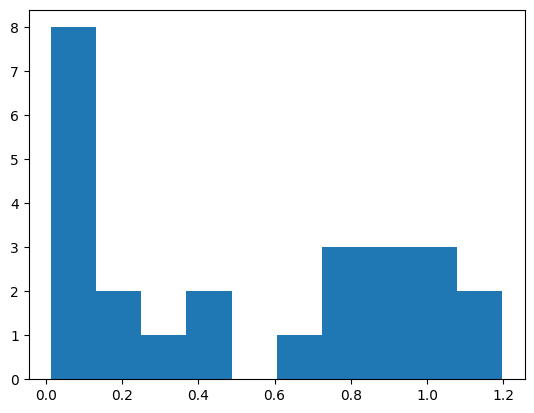

In [ ]:
#plotting histograms (to see outliers)
plt.hist(mydataframe["Dye pair1 (FRET)"])

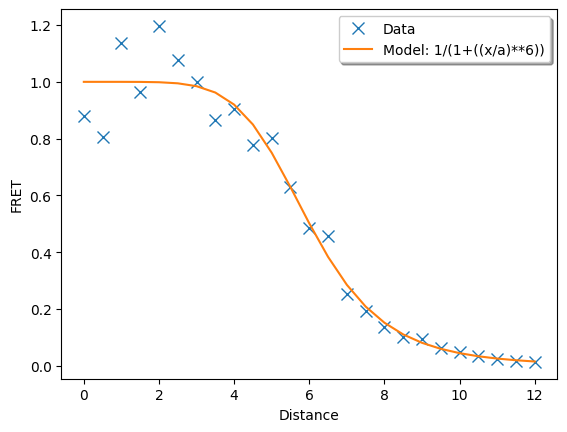

In [ ]:
#fitting data to the model
from numpy import array
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

x = mydataframe["Distance (nm)"]
y = mydataframe["Dye pair1 (FRET)"]

def func1(x, a):
    return  1/(1+((x/a)**6)) # 1/(1+((x/a)**6))

params, covs = curve_fit(func1, x, y)

a = params[0]
yfitted = 1/(1+((x/a)**6))

plt.plot(x,y, linestyle='none',marker='x', markerfacecolor='blue', markersize=8, label = 'Data')
plt.plot(x, yfitted, label="Model: 1/(1+((x/a)**6))")
plt.xlabel('Distance')
plt.ylabel('FRET')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.show()

In [ ]:
yfitted

0     1.000000
1     1.000000
2     0.999979
3     0.999758
4     0.998640
5     0.994831
6     0.984721
7     0.962348
8     0.919812
9     0.849808
10    0.750435
11    0.629266
12    0.501751
13    0.383846
14    0.285386
15    0.208852
16    0.151988
17    0.110776
18    0.081227
19    0.060076
20    0.044875
21    0.033872
22    0.025836
23    0.019908
24    0.015491
Name: Distance (nm), dtype: float64

In [ ]:
#SSE for the fit
import numpy as np
sse = np.sum((mydataframe['Dye pair1 (FRET)']-yfitted)**2)
print(f"sse: {sse}")

sse: 0.14265979582505492


In [ ]:
print("Ro =", a)

Ro = 6.007006332118515


In [ ]:
#idk if that's correct but it estimated Ro correctly so I'll choose to trust it
standard_error = np.sqrt(np.diag(covs))

print("Parameter estimates:", params)
print("Standard error:", standard_error)

Parameter estimates: [6.00700633]
Standard error: [0.13250291]


In [ ]:
residuals = y-yfitted
residuals

0    -0.118886
1    -0.192421
2     0.135592
3    -0.035243
4     0.198229
5     0.082116
6     0.014985
7    -0.098320
8    -0.014377
9    -0.073629
10    0.053554
11   -0.000914
12   -0.015556
13    0.073760
14   -0.032039
15   -0.014462
16   -0.015078
17   -0.007296
18    0.014122
19    0.003527
20    0.003301
21    0.002226
22   -0.001845
23   -0.003862
24   -0.001490
dtype: float64

In [ ]:
mydataframe["fitted values"] = yfitted
mydataframe["residuals"] = residuals
mydataframe.drop(columns=['Unnamed: 2'])

,Distance (nm),Dye pair1 (FRET),fitted values,residuals
0,0.0,0.881114,1.000000,-0.118886
1,0.5,0.807579,1.000000,-0.192421
2,1.0,1.135571,0.999979,0.135592
3,1.5,0.964515,0.999758,-0.035243
4,2.0,1.196868,0.998640,0.198229
5,2.5,1.076947,0.994831,0.082116
6,3.0,0.999706,0.984721,0.014985
7,3.5,0.864028,0.962348,-0.098320
8,4.0,0.905435,0.919812,-0.014377
9,4.5,0.776179,0.849808,-0.073629


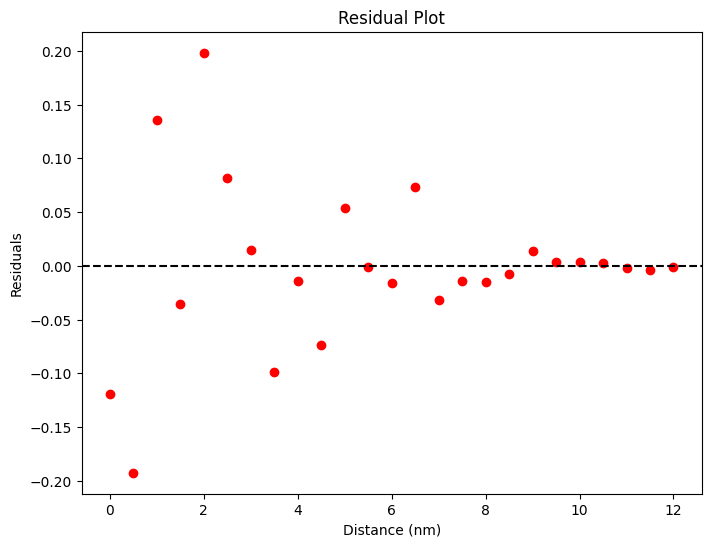

In [ ]:
# Plotting the residual plot
plt.figure(figsize=(8, 6))
plt.scatter( mydataframe["Distance (nm)"], residuals, color='red')
plt.xlabel('Distance (nm)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

Text(0, 0.5, 'residuals')

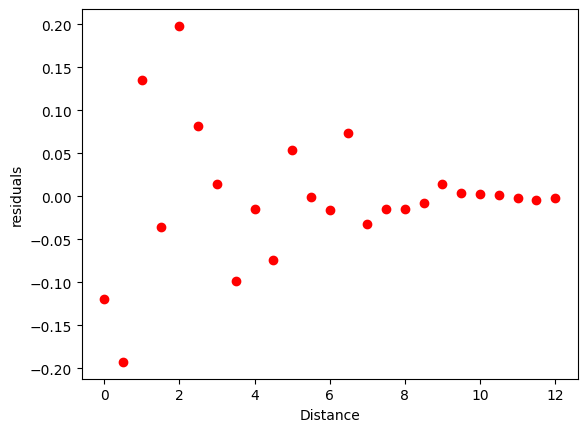

In [ ]:
plt.plot(mydataframe.iloc[:,0], residuals,marker='o', linestyle="", color = 'red')
plt.xlabel('Distance')
plt.ylabel('residuals')

In [ ]:
# these two residual vs. x plots are the same but method is kinda different

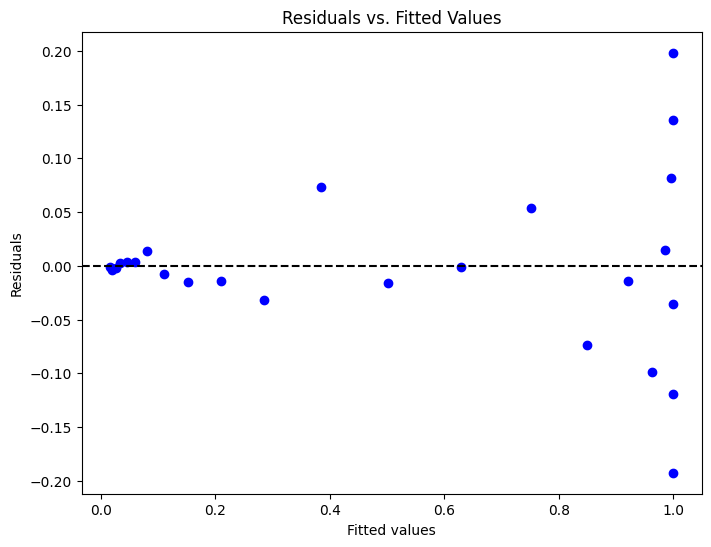

In [ ]:
# Plotting residuals vs. fitted values
plt.figure(figsize=(8, 6))
plt.scatter(yfitted, residuals, color='blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

((array([-1.9213301 , -1.50368257, -1.24941883, -1.0573306 , -0.897955  ,
         -0.75865603, -0.63273432, -0.51614096, -0.40618759, -0.30094875,
         -0.19894932, -0.09898372,  0.        ,  0.09898372,  0.19894932,
          0.30094875,  0.40618759,  0.51614096,  0.63273432,  0.75865603,
          0.897955  ,  1.0573306 ,  1.24941883,  1.50368257,  1.9213301 ]),
  array([-0.19242098, -0.11888596, -0.09831993, -0.07362905, -0.03524253,
         -0.03203925, -0.01555637, -0.01507839, -0.01446226, -0.01437717,
         -0.00729644, -0.00386218, -0.00184493, -0.00148957, -0.00091386,
          0.00222574,  0.00330091,  0.00352685,  0.01412175,  0.01498463,
          0.05355411,  0.07376   ,  0.08211616,  0.13559192,  0.19822865])),
 (0.07610318250519268, -0.0017603265953011348, 0.9446866002661414))

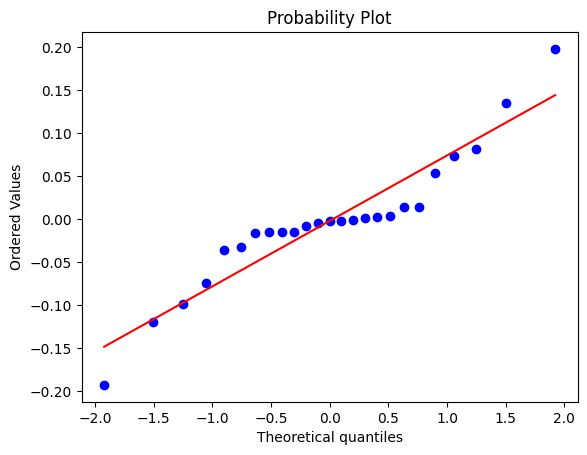

In [ ]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

stats.probplot(mydataframe["residuals"], dist="norm", plot=plt)

In [ ]:
# normality of residuals
#(if p value is HIGHER then 0.05 then data is normally distributed)
#(first value is test statistic)
from scipy.stats import shapiro
print(shapiro(mydataframe["residuals"]))

ShapiroResult(statistic=0.9156227111816406, pvalue=0.040762171149253845)


In [ ]:
#Smirnov test (this one I don't get, probably the same with p value but idk)
from scipy.stats import kstest

print(kstest(mydataframe["residuals"], 'norm'))

KstestResult(statistic=0.42370622855210965, pvalue=0.0001378866869140184, statistic_location=-0.1924209834389804, statistic_sign=-1)


In [ ]:
# SSE, RMSE, MSE
import numpy as np
sse = np.sum((mydataframe["Dye pair1 (FRET)"]-yfitted)**2)

#MSE
import numpy as np
from sklearn.metrics import mean_squared_error


y_true = mydataframe.iloc[:,1]
y_pred = yfitted
result = np.mean(np.square(y_true - y_pred))


#RMSE
#import necessary libraries
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
RMSE = sqrt(mean_squared_error(y_true, y_pred))
#print all
print(f'MSE: {result}', f'SSE:{sse}', f'RMSE:{RMSE}')

MSE: 0.005706391833002197 SSE:0.14265979582505492 RMSE:0.07554066344031006


Linear regression

In [ ]:
import pandas as pd

# Path to the text file in Google Drive
file_path = '/content/drive/My Drive/mathmodelling/Age_Distance.txt'

# Read the text file into a Pandas DataFrame
mydataframe1 = pd.read_csv(file_path, delimiter='\t')  # Adjust delimiter based on your file format

In [ ]:
mydataframe1

,Age,Distance
0,18,510
1,20,590
2,22,560
3,23,510
4,23,460
5,25,490
6,27,560
7,28,510
8,29,460
9,32,410


Text(0, 0.5, 'Distance')

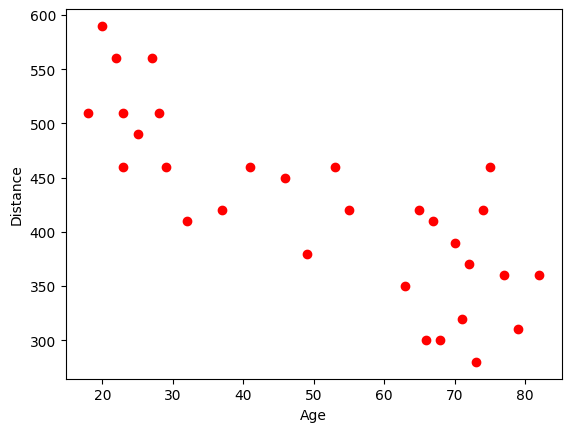

In [ ]:
import matplotlib.pyplot as plt
plt.plot(mydataframe1.iloc[:,0], mydataframe1.iloc[:,1],marker='o', linestyle="", color = 'red')
plt.xlabel('Age')
plt.ylabel('Distance')

In [ ]:
from sklearn.linear_model import LinearRegression
x = mydataframe1["Age"]
x = x.values.reshape(-1,1) #row to column
y = mydataframe1["Distance"]

m = LinearRegression()
m.fit (x,y)
yfit1 = m.coef_*x + m.intercept_ # y = mx + b    intercept_ is intercept on y axis, coef_ is slope

#Print coefficients
print("Slope: \n", m.coef_)
print("Intercept: \n", m.intercept_)

Slope: 
 [-3.00683537]
Intercept: 
 576.6819371727748


                            OLS Regression Results                            
Dep. Variable:               Distance   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     50.21
Date:                Fri, 31 May 2024   Prob (F-statistic):           1.04e-07
Time:                        20:09:31   Log-Likelihood:                -158.75
No. Observations:                  30   AIC:                             321.5
Df Residuals:                      28   BIC:                             324.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        576.6819     23.471     24.570      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/regressionplots.py:157: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  ax.plot(x1, results.fittedvalues[x1_argsort], 'D', color='r',


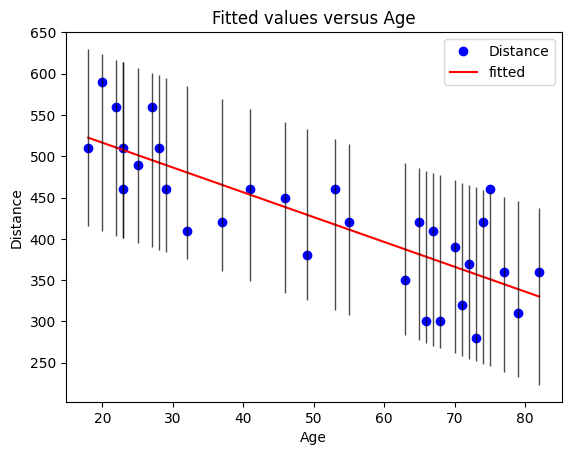

In [ ]:
#Using Statsmodels ordinary least squares (ols) function
import statsmodels.api as sm
x = mydataframe1["Age"]
y = mydataframe1["Distance"]
x = sm.add_constant(x)

fittedmodel = sm.OLS(y,x).fit()  #"my_model" is just the name you give to your results
print(fittedmodel.summary())

#plotting values
fig,ax = plt.subplots()
fig = sm.graphics.plot_fit(fittedmodel,1,ax=ax, vlines = True, ls = "-", marker = "None")

In [ ]:
fittedmodel.fittedvalues

0     522.558901
1     516.545230
2     510.531559
3     507.524724
4     507.524724
5     501.511053
6     495.497382
7     492.490547
8     489.483711
9     480.463205
10    465.429029
11    453.401687
12    438.367510
13    429.347004
14    417.319663
15    411.305992
16    387.251309
17    381.237638
18    378.230803
19    375.223967
20    372.217132
21    366.203461
22    363.196626
23    360.189791
24    357.182955
25    354.176120
26    351.169284
27    345.155614
28    339.141943
29    330.121437
dtype: float64

In [ ]:
# print only b0 and b1
# b0 is the intercept of the regression line; that is the predicted value when x = 0 . b1 is the slope of the regression line.

In [ ]:
# Extract the slope and intercept
intercept, slope = fittedmodel.params

# Print the slope and intercept
print(f"Slope (b1): {slope}")
print(f"Intercept (b0): {intercept}")

Slope (b1): -3.0068353694008136
Intercept (b0): 576.6819371727748


In [ ]:
#standard errors for the parameters
standard_errors = fittedmodel.bse
x = sm.add_constant(x)
intercept_se = standard_errors['const'] #from OLS
slope_se = standard_errors['Age']   #from OLS
print(f"Intercept: {intercept}, Standard Error: {intercept_se}")
print(f"Slope: {slope}, Standard Error: {slope_se}")

Intercept: 576.6819371727748, Standard Error: 23.470880773770944
Slope: -3.0068353694008136, Standard Error: 0.4243373463785598


In [ ]:
import numpy as np

In [ ]:
#sse
sse = np.sum((mydataframe1['Distance']-fittedmodel.fittedvalues)**2)
print(f"sse: {sse}")

sse: 69334.02414194297


In [ ]:
ssr = np.sum((fittedmodel.fittedvalues - mydataframe1['Distance'].mean())**2)
print(f"ssr: {ssr}")

ssr: 124332.64252472362


In [ ]:
ssto = sse + ssr
print(f"ssto: {ssto}")

ssto: 193666.66666666657


In [ ]:
# Calculate r^2 and r
fittedmodel.rsquared
print(f"R^2: {fittedmodel.rsquared}")

R^2: 0.641992990661224


In [ ]:
import math as math
r = (math.sqrt(fittedmodel.rsquared))
print(r)

0.8012446509407872


In [ ]:
#MSE
mse = fittedmodel.mse_resid

In [ ]:
#RMSE
RMSE = np.sqrt(mse)
RMSE

49.7615830528585

In [ ]:
#MSR
fittedmodel.mse_total

6678.160919540229

In [ ]:
#F-test
fittedmodel.fvalue

50.210759201935254

In [ ]:
#F-test p-values
fittedmodel.f_pvalue

1.0409975572931573e-07

INFLUENCE, LEVERAGE ETC

In [ ]:
influence = fittedmodel.get_influence() #where model is the name of the ols output you have chosen
leverage = influence.hat_matrix_diag
leverage

array([0.11252182, 0.10321408, 0.09448807, 0.09034322, 0.09034322,
       0.08248982, 0.07521815, 0.07180047, 0.06852821, 0.05958406,
       0.04758581, 0.040605  , 0.03515125, 0.0336242 , 0.0336242 ,
       0.0344968 , 0.04380454, 0.04758581, 0.04969459, 0.05194881,
       0.05434846, 0.05958406, 0.06242001, 0.0654014 , 0.06852821,
       0.07180047, 0.07521815, 0.08248982, 0.09034322, 0.10321408])

In [ ]:
mydataframe1["leverage"] = leverage
mydataframe1

,Age,Distance,leverage
0,18,510,0.112522
1,20,590,0.103214
2,22,560,0.094488
3,23,510,0.090343
4,23,460,0.090343
5,25,490,0.082490
6,27,560,0.075218
7,28,510,0.071800
8,29,460,0.068528
9,32,410,0.059584


Text(0, 0.5, 'leverage')

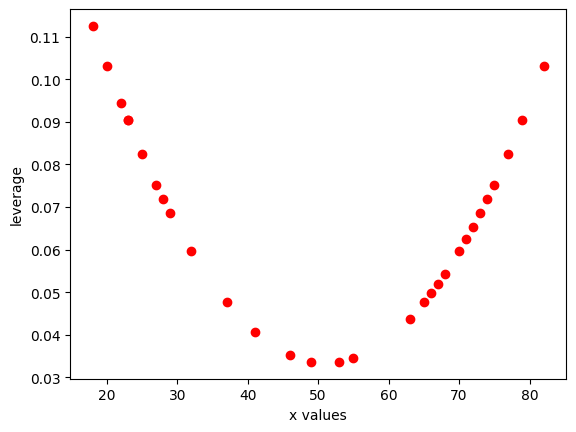

In [ ]:
plt.plot(mydataframe1.iloc[:,0], mydataframe1.iloc[:,2],marker='o', linestyle="", color = 'red')
plt.xlabel('x values')
plt.ylabel('leverage')
#why this shape?

Text(0, 0.5, 'studentized residuals')

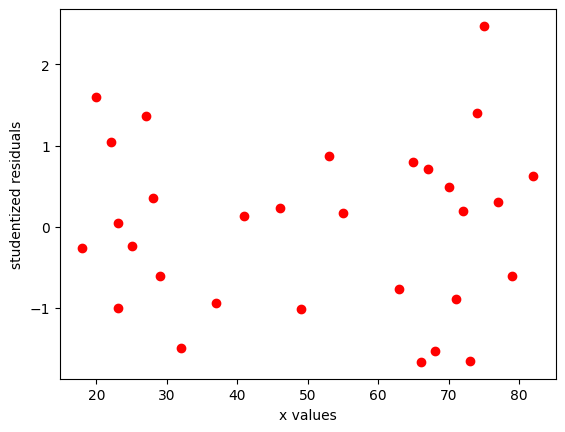

In [ ]:
student_resid = influence.resid_studentized_external
plt.plot(mydataframe1.iloc[:,0], student_resid,marker='o', linestyle="", color = 'red')
plt.xlabel('x values')
plt.ylabel('studentized residuals')

Text(0, 0.5, 'ydata t-dist')

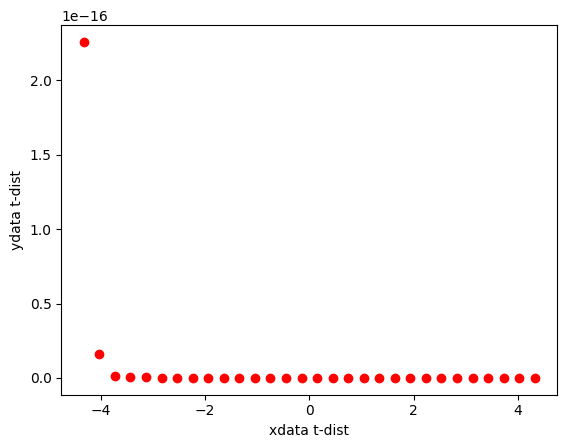

In [ ]:
from scipy.stats import t
import numpy as np
n = 30
k = 2
freedom = n-k-2
t_x = mydataframe1.iloc[:,0]

rv = t(df=freedom, loc=0, scale=1)
xdataplot = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 30) # xdata for plot

ydataplot = rv.pdf(t_x) # ydata for plot
plt.plot(xdataplot, ydataplot,marker='o', linestyle="", color = 'red')
plt.xlabel('xdata t-dist')
plt.ylabel('ydata t-dist')

Text(0, 0.5, 'studentized residuals')

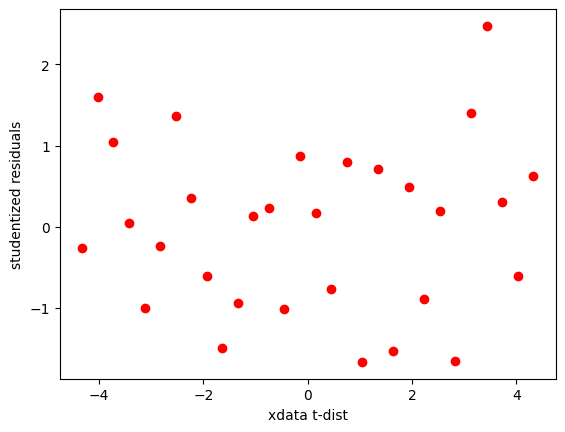

In [ ]:
plt.plot(xdataplot, student_resid,marker='o', linestyle="", color = 'red')
plt.xlabel('xdata t-dist')
plt.ylabel('studentized residuals')

In [ ]:
#DFFITS
(dffits, p) = influence.dffits
(dffits, p)

(array([-0.0937947 ,  0.54340166,  0.33803719,  0.01614075, -0.31558576,
        -0.07118128,  0.39036996,  0.09998629, -0.16462603, -0.37550432,
        -0.20861707,  0.02735748,  0.0446511 , -0.18822977,  0.16203238,
         0.03302248, -0.16261344,  0.17722692, -0.38023025,  0.1665241 ,
        -0.3661927 ,  0.12242262, -0.23048164,  0.05301248, -0.44927261,
         0.38828389,  0.7053898 ,  0.0918573 , -0.19131156,  0.21275972]),
 0.5163977794943222)

In [ ]:
import numpy as np

critical_value = np.sqrt(k + 2 / (n - k - 2))

# Compare each DFFITS value to the critical value
outliers = np.abs(dffits) > critical_value

# Print or use the outliers array as needed
print(outliers)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]


In [ ]:
#DFBETAS
dfbetas = influence.dfbetas  #The first column is for b0, the second for b1
dfbetas

array([[-0.09231168,  0.07868482],
       [ 0.53180552, -0.44712634],
       [ 0.32846887, -0.27195125],
       [ 0.0156174 , -0.01282186],
       [-0.3053531 ,  0.25069444],
       [-0.06817996,  0.05494852],
       [ 0.36918433, -0.29130194],
       [ 0.09385042, -0.07318494],
       [-0.15322504,  0.11797868],
       [-0.33852794,  0.24924161],
       [-0.17285656,  0.11417111],
       [ 0.02026936, -0.0115772 ],
       [ 0.02619352, -0.01015427],
       [-0.08868689,  0.01750691],
       [ 0.0485526 ,  0.01507033],
       [ 0.00697327,  0.00606453],
       [ 0.0183987 , -0.07950514],
       [-0.0320148 ,  0.09699204],
       [ 0.08062379, -0.21817271],
       [-0.04027966,  0.09968421],
       [ 0.09894945, -0.22770998],
       [-0.03947993,  0.08125822],
       [ 0.07987308, -0.1573336 ],
       [-0.01957765,  0.03712111],
       [ 0.17558222, -0.32196968],
       [-0.1596422 ,  0.2842043 ],
       [-0.30357689,  0.5263761 ],
       [-0.04277914,  0.07090942],
       [ 0.09514478,

In [ ]:
import numpy as np

critical_valuebeta =2*np.sqrt(n)

# Compare each DFFITS value to the critical value
outliersbeta = np.abs(dfbetas) > critical_valuebeta

# Print or use the outliers array as needed
print(outliersbeta)

[[False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]]


Confidence intervals ??????

In [ ]:
import numpy as np
import scipy.stats

def mean_confidence_interval(fittedmodel, confidence=0.85):
    a = 1.0 * np.array(fittedmodel)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [ ]:
from statistics import NormalDist

def confidence_interval(fittedmodel, confidence=0.85):
  dist = NormalDist.from_samples(fittedmodel)
  z = NormalDist().inv_cdf((1 + confidence) / 2.)
  h = dist.stdev * z / ((len(fittedmodel) - 1) ** .5)
  return dist.mean - h, dist.mean + h